In [18]:
from openqaoa.problems import QUBO
from openqaoa import QAOA

### DESCRIPTION OF THE PROBLEM
This is a simple example of a QUBO problem (Quadratic Unconstrained Binary Optimization).
\begin{align}
y = -5x_0 -3x_1 -8x_2 -6x_3 +4x_0x_1 +8x_0x_2 +2x_1x_2 +10x_2x_3
\end{align}

Matrix form:

Since binary variables satisfy $x_i = x_i^2$:
\begin{align}
        y =
        (x_0 \; x_1 \; x_2 \; x_3)
        \begin{pmatrix}
            -5 & 2 & 4 & 0\\ 
            2 & -3 & 1 & 0\\
            4 & 1 & -8 & 5\\
            0 & 0 & 5 & -6
        \end{pmatrix}
        \begin{pmatrix}
            x_0 \\ x_1 \\ x_2 \\ x_3
        \end{pmatrix}
        =
        \textbf{x$^\textbf{T}$Qx}
        \tag{2}
\end{align}

\begin{align}
y^{*} = \min y \tag{3}
\end{align}

\begin{align}
\textbf{x}^{\textbf{*}} = \arg \min y \tag{4}
\end{align}

In the case of graph colouring, the quadratic terms are zero, since there are no loops. Once got the cost function, the solution would be calculated similarly to this. Because of lack of time, I did not create the function of the cost function/calculated the weights numerically.

In [19]:
x0x1, x0x2, x0x3, x1x2, x1x3, x2x3, x0, x1, x2, x3 = 4, 8, 0, 2, 0, 10, -5, -3, -8, -6

qubo_problem = QUBO(n=4, terms=[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0], [1], [2], [3]], weights=[x0x1, x0x2, x0x3, x1x2, x1x3, x2x3, x0, x1, x2, x3])
qubo_problem.asdict()

{'terms': [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3], [0], [1], [2], [3]],
 'weights': [4.0, 8.0, 0.0, 2.0, 0.0, 10.0, -5.0, -3.0, -8.0, -6.0],
 'constant': 0,
 'n': 4,
 'problem_instance': {'problem_type': 'generic_qubo'},
 'metadata': {}}

The solution to the equations 3 and 4 are: $y^*$ = -11, $x_0^*$ = $x_3^*$ = 1, $x_1^*$ = $x_2^*$ = 0.

Solving the problem with QAOA in a Quantum Simulator:

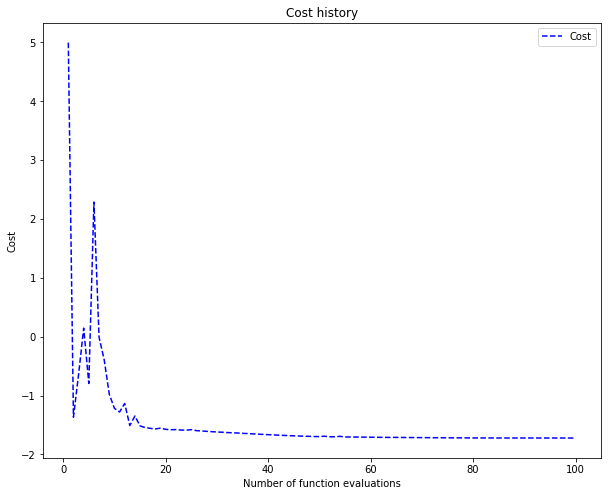

In [20]:
q = QAOA()
q.compile(qubo_problem)
q.optimize()
result = q.result
result.plot_cost()

In [21]:
result.optimized

{'angles': [1.243729362954, 0.340245636307],
 'cost': -1.720743265023,
 'measurement_outcomes': array([-0.12864806+0.10612882j, -0.09740045+0.21169534j,
        -0.03200846+0.03879354j, -0.03902651+0.14660317j,
        -0.12930469-0.11503485j,  0.00699163-0.07406441j,
         0.160736  +0.29802834j, -0.0941285 +0.14185505j,
         0.21362316+0.10500403j,  0.44907972+0.06726187j,
         0.07424044+0.23259368j,  0.19794531+0.05813571j,
         0.16813648+0.19127032j,  0.05549009+0.00557399j,
         0.02316411-0.43732588j,  0.24970117-0.16148j   ]),
 'job_id': '1729f0da-1c44-43ff-8067-225f5e277850',
 'eval_number': 100}

In [22]:
result.most_probable_states

{'solutions_bitstrings': ['1001'], 'bitstring_energy': -20.0}